In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
! git clone https://github.com/fastai/fastai2
! cd fastai2
! conda env create -f environment.yml
! source activate fastai2
! pip install fastai2


Cloning into 'fastai2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 7808 (delta 4), reused 5 (delta 2), pack-reused 7792
Receiving objects: 100% (7808/7808), 434.62 MiB | 37.66 MiB/s, done.
Resolving deltas: 100% (6265/6265), done.
/bin/bash: conda: command not found
/bin/bash: activate: No such file or directory
     |████████████████████████████████| 184kB 4.9MB/s 


In [0]:
!pip install fastcore


In [0]:
!pip install nbdev


     |████████████████████████████████| 51kB 2.7MB/s 


In [0]:
! pip install pydicom kornia opencv-python scikit-image

     |████████████████████████████████| 35.3MB 89kB/s 
     |████████████████████████████████| 143kB 51.9MB/s 


In [0]:
!pip install torch torchvision feather-format kornia pyarrow --upgrade   > /dev/null

In [0]:
!pip uninstall -y pyarrow
!pip install --upgrade pip
!pip install --upgrade pyarrow
!pyarrow -v

[autoreload of pyarrow failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: module 'pyarrow' has no attribute 'compat'
]
[autoreload of pyarrow.types failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: module 'pyarrow.lib' has no attribute 'Type_DURATION'
]


Uninstalling pyarrow-0.16.0:
  Successfully uninstalled pyarrow-0.16.0
     |████████████████████████████████| 1.4MB 4.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Using cached pyarrow-0.16.0-cp36-cp36m-manylinux2014_x86_64.whl (63.1 MB)


/bin/bash: pyarrow: command not found


In [0]:

from fastai2.basics import *
from fastai2.medical.imaging  import *

In [0]:
from fastai2.vision import *

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install --upgrade kaggle
!kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=312065eeaa0f1fb029e47875696352cdffc2f1db33a6719fe84404ff8d6f6ecb
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
path = Path('../input/rsna')

In [0]:
! kaggle competitions download -c rsna-pneumonia-detection-challenge -p {path}


100% 3.66G/3.66G [01:08<00:00, 17.1MB/s]
100% 3.66G/3.66G [01:08<00:00, 57.2MB/s]


In [0]:
path.ls()

(#1) [Path('../input/rsna/rsna-pneumonia-detection-challenge.zip')]

In [0]:
# !unzip \*.zip
! unzip -q -n {path}/rsna-pneumonia-detection-challenge.zip -d {path}


In [0]:
path.ls()

(#7) [Path('../input/rsna/stage_2_test_images'),Path('../input/rsna/stage_2_train_labels.csv'),Path('../input/rsna/stage_2_train_images'),Path('../input/rsna/GCP Credits Request Link - RSNA.txt'),Path('../input/rsna/rsna-pneumonia-detection-challenge.zip'),Path('../input/rsna/stage_2_detailed_class_info.csv'),Path('../input/rsna/stage_2_sample_submission.csv')]

In [0]:
# Setting the file path
# path = Path('../Project - Final')
path_trn = path/'stage_2_train_images'
path_tst = path/'stage_2_test_images'

In [0]:
fns_trn = path_trn.ls()
fns_trn[:5].attrgot('name')

(#5) ['cb30c3d6-cb5c-4d23-ad41-0340c50b30f5.dcm','d0ebe778-257e-46e9-be12-0274a344a274.dcm','a155c5e3-7c43-4971-9acc-aa16fb923cfa.dcm','6f0aa949-7f96-4fad-a852-4224a159834b.dcm','9f756055-99fc-4a80-97b4-f89f98cf92d2.dcm']

In [0]:
fns_tst = path_tst.ls()
len(fns_trn),len(fns_tst)

(26684, 3000)

In [0]:
# Read Image without Lung Opacity
fn = fns_trn[0]
dcm = fn.dcmread()
dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.18067.1517874408.375750
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'cb30c3d6-cb5c-4d23-ad41-0340c50b30f5'
(0010, 0020) Patient ID                          LO: 'cb30c3d6-cb5c-4d23-ad41-0340c50b30f5'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

In [0]:
# Read Image with Lung Opacity
fn1 = fns_trn[4]
dcm1 = fn1.dcmread()
dcm1

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.16592.1517874398.438468
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '9f756055-99fc-4a80-97b4-f89f98cf92d2'
(0010, 0020) Patient ID                          LO: '9f756055-99fc-4a80-97b4-f89f98cf92d2'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

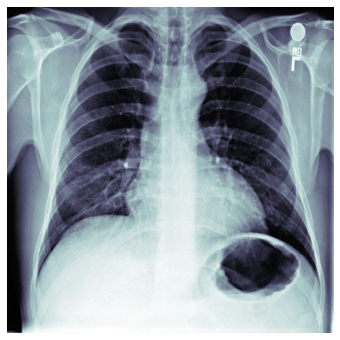

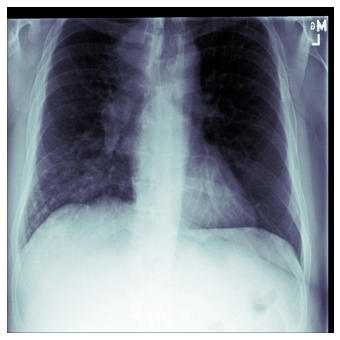

In [0]:
# Print Image without Lung Opacity
dcm.show(figsize=(6,6))
# Print Image with Lung Opacity
dcm1.show(figsize=(6,6))

In [0]:
# Read the Detailed Class Info
detailed_lbls = path/'stage_2_detailed_class_info.csv'
deta_lbls = pd.read_csv(detailed_lbls)
deta_lbls.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [0]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
deta_lbls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [0]:
deta_lbls['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [0]:
deta_lbls.nunique()

patientId    26684
class            3
dtype: int64

## Observation : Number of unique patientIds = 26684 and the number of rows in the Data Frame = 30227. This indicates that there are duplicate entries for some of the patientIds. 

In [0]:
# Printing the duplicate Patient IDs
duplicate_patients = deta_lbls[deta_lbls.patientId.duplicated(keep=False)].sort_values("patientId")
duplicate_patients

,patientId,class
28990,000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
28991,000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
28992,000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
28993,000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
28994,001031d9-f904-4a23-b3e5-2c088acd19c6,Lung Opacity
...,...,...
28946,ffa424d2-6e6b-4eed-93ab-7551e8941215,Lung Opacity
28966,ffd787b6-59ca-48cb-bd15-bcedd52cf37c,Lung Opacity
28967,ffd787b6-59ca-48cb-bd15-bcedd52cf37c,Lung Opacity
28983,fffb2395-8edd-4954-8a89-ffe2fd329be3,Lung Opacity


In [0]:
duplicate_patients.nunique()

patientId    3398
class           1
dtype: int64

## Observation : the above Count of duplicate Patient IDs indicate that there is only 1 unique count for Class and hence only one entry per duplicate Patient ID only needs to be retained. The rest of the duplicates can be dropped.

In [0]:
deta_lbls = deta_lbls.drop_duplicates(["patientId"], keep='first').reset_index(drop=True)


In [0]:
# Ensuring all duplicates are removed
deta_lbls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  26684 non-null  object
 1   class      26684 non-null  object
dtypes: object(2)
memory usage: 417.1+ KB


In [0]:
deta_lbls['class']=deta_lbls['class'].astype('category')

In [0]:
deta_lbls_rev = deta_lbls.copy(deep=True)

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [0]:
class_cat = le.fit_transform(deta_lbls["class"])

In [0]:
#initialize the encoded categorical columns
deta_lbls_rev['class_cat'] = class_cat

In [0]:
#drop the old categorical columns from dataframe
dummy_field = ['class']
deta_lbls_rev = deta_lbls_rev.drop(dummy_field, axis = 1)

In [0]:
# Re-index the new dataframe and view it
deta_lbls_rev = deta_lbls_rev.reindex(['patientId','class_cat'], axis= 1)
deta_lbls_rev.head(10)

,patientId,class_cat
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,2
4,00436515-870c-4b36-a041-de91049b9ab4,0
5,00569f44-917d-4c86-a842-81832af98c30,1
6,006cec2e-6ce2-4549-bffa-eadfcd1e9970,1
7,00704310-78a8-4b38-8475-49f4573b2dbb,0
8,008c19e8-a820-403a-930a-bc74a4053664,1
9,009482dc-3db5-48d4-8580-5c89c4f01334,2


In [0]:
deta_lbls['class'].value_counts()

No Lung Opacity / Not Normal    11821
Normal                           8851
Lung Opacity                     6012
Name: class, dtype: int64

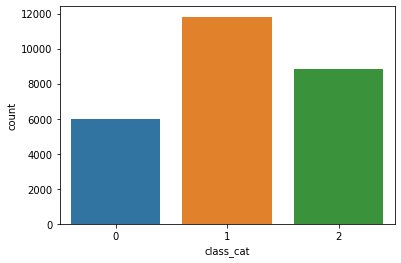

In [0]:
sns.countplot(deta_lbls_rev['class_cat'])

## Observation : Data is slightly skewed towards Class = 'No Lung Opacity / Not Normal'; however the skew isn't a heavy one, so can live with it since the real world scenario is going to be such as well.

In [0]:
# Read the BBox values
path_lbls = path/'stage_2_train_labels.csv'
lbls = pd.read_csv(path_lbls)
lbls.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [0]:
lbls.drop_duplicates(['patientId'], inplace=True)

In [0]:
# Renaming the patientId column to be PatientId in order to make it consistent with the Image Metadata
deta_lbls_rev.rename(columns = {'patientId':'PatientID'}, inplace = True) 
lbls.rename(columns = {'patientId':'PatientID'}, inplace = True) 

In [0]:
lbls.head()

,PatientID,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [0]:
lbls.count()

PatientID    26684
x             6012
y             6012
width         6012
height        6012
Target       26684
dtype: int64

In [0]:
lbls['Target'].value_counts()

0    20672
1     6012
Name: Target, dtype: int64

## Observation : the images with Target value '1' (with Lung Opacity) have values for the attributes 'x', 'y', 'width' and 'height'and Taget value '0' has no values for these attributes; thus safely concluding that there are no missing bounding box values for the Lung Opacity cases.

In [0]:
deta_lbls_rev.head()

,PatientID,class_cat
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,2
4,00436515-870c-4b36-a041-de91049b9ab4,0


In [0]:
# Creating a Data Frame to store Test Image Metadata
df_tst = pd.DataFrame.from_dicoms(fns_tst, px_summ=True)
#df_tst.to_feather('df_tst.fth')
df_tst.head()

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.7338.1517874331.59085,19010101,000000.00,,CR,WSD,,view: AP,28072866-534c-468f-92e0-ea14b79b9421,28072866-534c-468f-92e0-ea14b79b9421,,F,31,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.7338.1517874331.59084,1.2.276.0.7230010.3.1.3.8323329.7338.1517874331.59083,,1,1,,1,MONOCHROME2,1024,1024,0.139,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_test_images/28072866-534c-468f-92e0-ea14b79b9421.dcm,1,0.139,0,255,114.152410,55.647313,0.262469
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.19802.1517874419.903417,19010101,000000.00,,CR,WSD,,view: AP,20b02346-0873-481f-a701-5ed8155717d0,20b02346-0873-481f-a701-5ed8155717d0,,M,21,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.19802.1517874419.903416,1.2.276.0.7230010.3.1.3.8323329.19802.1517874419.903415,,1,1,,1,MONOCHROME2,1024,1024,0.139,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_test_images/20b02346-0873-481f-a701-5ed8155717d0.dcm,1,0.139,0,255,103.719934,47.309527,0.255092
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.17652.1517874405.348481,19010101,000000.00,,CR,WSD,,view: AP,0f3b2f60-d088-4e3e-b4fe-215bb5602926,0f3b2f60-d088-4e3e-b4fe-215bb5602926,,F,29,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.17652.1517874405.348480,1.2.276.0.7230010.3.1.3.8323329.17652.1517874405.348479,,1,1,,1,MONOCHROME2,1024,1024,0.171,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_test_images/0f3b2f60-d088-4e3e-b4fe-215bb5602926.dcm,1,0.171,0,241,128.741858,56.174007,0.188134
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.16725.1517874399.202247,19010101,000000.00,,CR,WSD,,view: AP,10fcfa38-7221-4801-8e56-2c6282c5a15a,10fcfa38-7221-4801-8e56-2c6282c5a15a,,M,74,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.16725.1517874399.202246,1.2.276.0.7230010.3.1.3.8323329.16725.1517874399.202245,,1,1,,1,MONOCHROME2,1024,1024,0.139,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_test_images/10fcfa38-7221-4801-8e56-2c6282c5a15a.dcm,1,0.139,0,255,115.408527,44.381174,0.172150
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2009.1517874294.14621,19010101,000000.00,,CR,WSD,,view: AP,1ec51b9a-c8bf-42ee-af6b-26081365724a,1ec51b9a-c8bf-42ee-af6b-26081365724a,,M,41,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.2009.1517874294.14620,1.2.276.0.7230010.3.1.3.8323329.2009.1517874294.14619,,1,1,,1,MONOCHROME2,1024,1024,0.168,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_test_images/1ec51b9a-c8bf-42ee-af6b-26081365724a.dcm,1,0.168,0,220,109.716052,52.556474,0.262918


In [0]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SpecificCharacterSet         3000 non-null   object 
 1   SOPClassUID                  3000 non-null   object 
 2   SOPInstanceUID               3000 non-null   object 
 3   StudyDate                    3000 non-null   object 
 4   StudyTime                    3000 non-null   object 
 5   AccessionNumber              3000 non-null   object 
 6   Modality                     3000 non-null   object 
 7   ConversionType               3000 non-null   object 
 8   ReferringPhysicianName       3000 non-null   object 
 9   SeriesDescription            3000 non-null   object 
 10  PatientName                  3000 non-null   object 
 11  PatientID                    3000 non-null   object 
 12  PatientBirthDate             3000 non-null   object 
 13  PatientSex        

In [0]:
# Creating a Data Frame to store Train Image Metadata
df_trn = pd.DataFrame.from_dicoms(fns_trn, px_summ=True)
# df_trn.to_feather('df_trn.fth')
df_trn.head()

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.18067.1517874408.375750,19010101,000000.00,,CR,WSD,,view: PA,cb30c3d6-cb5c-4d23-ad41-0340c50b30f5,cb30c3d6-cb5c-4d23-ad41-0340c50b30f5,,M,45,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.18067.1517874408.375749,1.2.276.0.7230010.3.1.3.8323329.18067.1517874408.375748,,1,1,,1,MONOCHROME2,1024,1024,0.171,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_train_images/cb30c3d6-cb5c-4d23-ad41-0340c50b30f5.dcm,1,0.171,0,236,170.041242,30.265313,0.010004
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2724.1517874298.108087,19010101,000000.00,,CR,WSD,,view: PA,d0ebe778-257e-46e9-be12-0274a344a274,d0ebe778-257e-46e9-be12-0274a344a274,,F,65,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.2724.1517874298.108086,1.2.276.0.7230010.3.1.3.8323329.2724.1517874298.108085,,1,1,,1,MONOCHROME2,1024,1024,0.168,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_train_images/d0ebe778-257e-46e9-be12-0274a344a274.dcm,1,0.168,0,253,143.153101,73.808176,0.222342
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.5095.1517874311.352810,19010101,000000.00,,CR,WSD,,view: AP,a155c5e3-7c43-4971-9acc-aa16fb923cfa,a155c5e3-7c43-4971-9acc-aa16fb923cfa,,M,21,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.5095.1517874311.352809,1.2.276.0.7230010.3.1.3.8323329.5095.1517874311.352808,,1,1,,1,MONOCHROME2,1024,1024,0.139,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_train_images/a155c5e3-7c43-4971-9acc-aa16fb923cfa.dcm,1,0.139,0,255,122.226710,51.236828,0.222688
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.10731.1517874353.749938,19010101,000000.00,,CR,WSD,,view: AP,6f0aa949-7f96-4fad-a852-4224a159834b,6f0aa949-7f96-4fad-a852-4224a159834b,,F,41,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.10731.1517874353.749937,1.2.276.0.7230010.3.1.3.8323329.10731.1517874353.749936,,1,1,,1,MONOCHROME2,1024,1024,0.168,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_train_images/6f0aa949-7f96-4fad-a852-4224a159834b.dcm,1,0.168,3,236,165.246969,36.832569,0.033782
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.16592.1517874398.438468,19010101,000000.00,,CR,WSD,,view: PA,9f756055-99fc-4a80-97b4-f89f98cf92d2,9f756055-99fc-4a80-97b4-f89f98cf92d2,,M,50,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.16592.1517874398.438467,1.2.276.0.7230010.3.1.3.8323329.16592.1517874398.438466,,1,1,,1,MONOCHROME2,1024,1024,0.168,8,8,7,0,01,ISO_10918_1,../input/rsna/stage_2_train_images/9f756055-99fc-4a80-97b4-f89f98cf92d2.dcm,1,0.168,0,255,189.257056,62.719448,0.016612


In [0]:
df_trn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriesNumber,26684.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
InstanceNumber,26684.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SamplesPerPixel,26684.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Rows,26684.0,1024.000000,0.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
Columns,26684.0,1024.000000,0.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
PixelSpacing,26684.0,0.155136,0.015991,0.115000,0.143000,0.143000,0.168000,0.198800
BitsAllocated,26684.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
BitsStored,26684.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
HighBit,26684.0,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000
PixelRepresentation,26684.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SpecificCharacterSet         26684 non-null  object 
 1   SOPClassUID                  26684 non-null  object 
 2   SOPInstanceUID               26684 non-null  object 
 3   StudyDate                    26684 non-null  object 
 4   StudyTime                    26684 non-null  object 
 5   AccessionNumber              26684 non-null  object 
 6   Modality                     26684 non-null  object 
 7   ConversionType               26684 non-null  object 
 8   ReferringPhysicianName       26684 non-null  object 
 9   SeriesDescription            26684 non-null  object 
 10  PatientName                  26684 non-null  object 
 11  PatientID                    26684 non-null  object 
 12  PatientBirthDate             26684 non-null  object 
 13  PatientSex      

In [0]:
# The the train_image and train_BBox tables
comb = df_trn.join(lbls.set_index('PatientID'), 'PatientID')

In [0]:
comb.head().T

,0,1,2,3,4
SpecificCharacterSet,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100
SOPClassUID,1.2.840.10008.5.1.4.1.1.7,1.2.840.10008.5.1.4.1.1.7,1.2.840.10008.5.1.4.1.1.7,1.2.840.10008.5.1.4.1.1.7,1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID,1.2.276.0.7230010.3.1.4.8323329.18067.1517874408.375750,1.2.276.0.7230010.3.1.4.8323329.2724.1517874298.108087,1.2.276.0.7230010.3.1.4.8323329.5095.1517874311.352810,1.2.276.0.7230010.3.1.4.8323329.10731.1517874353.749938,1.2.276.0.7230010.3.1.4.8323329.16592.1517874398.438468
StudyDate,19010101,19010101,19010101,19010101,19010101
StudyTime,000000.00,000000.00,000000.00,000000.00,000000.00
AccessionNumber,,,,,
Modality,CR,CR,CR,CR,CR
ConversionType,WSD,WSD,WSD,WSD,WSD
ReferringPhysicianName,,,,,
SeriesDescription,view: PA,view: PA,view: AP,view: AP,view: PA


In [0]:
comb.count()

SpecificCharacterSet           26684
SOPClassUID                    26684
SOPInstanceUID                 26684
StudyDate                      26684
StudyTime                      26684
AccessionNumber                26684
Modality                       26684
ConversionType                 26684
ReferringPhysicianName         26684
SeriesDescription              26684
PatientName                    26684
PatientID                      26684
PatientBirthDate               26684
PatientSex                     26684
PatientAge                     26684
BodyPartExamined               26684
ViewPosition                   26684
StudyInstanceUID               26684
SeriesInstanceUID              26684
StudyID                        26684
SeriesNumber                   26684
InstanceNumber                 26684
PatientOrientation             26684
SamplesPerPixel                26684
PhotometricInterpretation      26684
Rows                           26684
Columns                        26684
P

In [0]:
repr_flds = ['BitsStored','PixelRepresentation']
comb.pivot_table(values=['PatientID','img_min','img_mean','img_max','img_pct_window'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min','PatientID':'count','img_pct_window':'mean'})

,,PatientID,img_max,img_mean,img_min,img_pct_window
BitsStored,PixelRepresentation,,,,,
8,0,26684,255,124.978564,0,0.217024


In [0]:
df_trn.SpecificCharacterSet.describe()

count          26684
unique             1
top       ISO_IR 100
freq           26684
Name: SpecificCharacterSet, dtype: object